# Import Libraries

In [1]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
filepath="C:/Users/MY PC/Downloads/archive1/"
df=pd.read_csv(filepath+"music dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Preprocessing

In [4]:
#determine the shape of the dataset
df.shape

(114000, 21)

In [4]:
df.artists.unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [5]:
# A general overview of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
#checking for null values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
# summary statistic of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [11]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [47]:
df['artists'].nunique()

31437

In [8]:
df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

# DESCRIPTIVE SUMMARY & DATA VISUALIZATION 

Text(0.5, 1.0, 'Popularity Distribution')

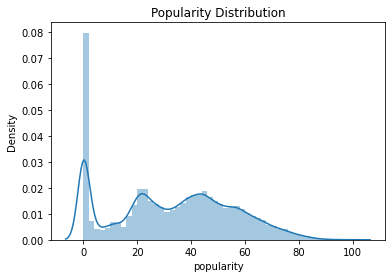

In [70]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'danceability Distribution')

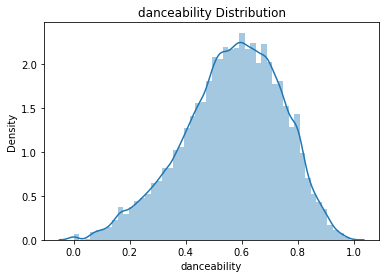

In [69]:
sns.distplot(df['danceability']).set_title('danceability Distribution')

<AxesSubplot:xlabel='mode', ylabel='count'>

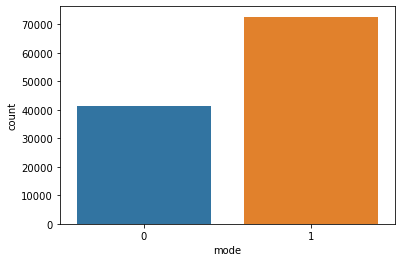

In [71]:
sns.countplot(df['mode'])

Text(0.5, 1.0, 'Danceability Based on Mode')

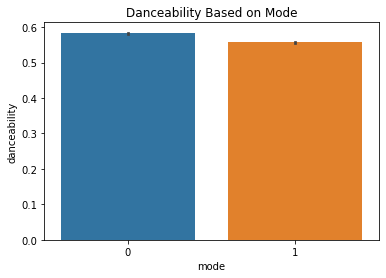

In [72]:
sns.barplot(x='mode', y='danceability', data=df)
plt.title('Danceability Based on Mode')

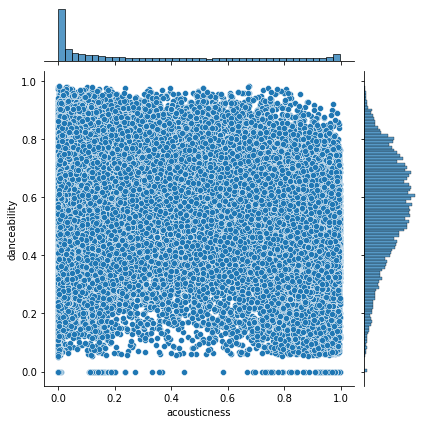

In [73]:
sns.jointplot(x='acousticness', y='danceability', data=df)

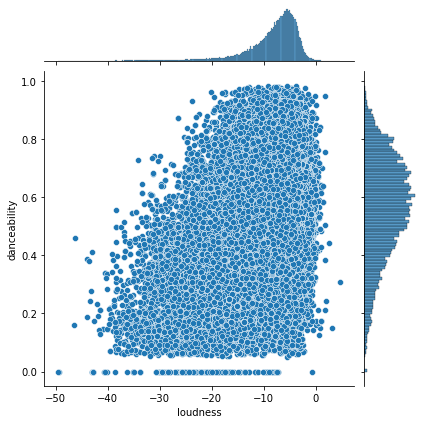

In [75]:
sns.jointplot(x='loudness', y='danceability', data=df)

# Top Five Popular Artist

In [62]:
#selecting the top five popular artists
popular_artist=df.groupby('artists').count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artist

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Name: popularity, dtype: int64

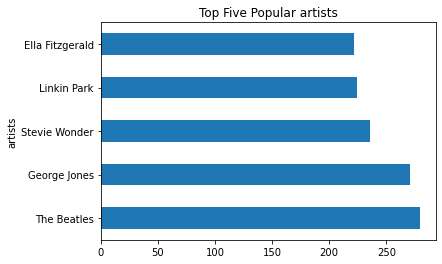

In [63]:
popular_artist.plot.barh()
plt.title('Top Five Popular artists')
plt.show()

# Top Five Danceable Song

In [27]:
danceable_song=df[['artists','track_name','danceability']].sort_values(by='danceability', ascending=False)[:5]
danceable_song

,artists,track_name,danceability
111635,Quantic,Sol Clap,0.985
66576,That Girl Lay Lay,Medicaid Baby,0.984
24916,Delano Smith,Inspiration,0.983
73374,Oliver Schories,Daily Routines,0.982
66793,Mixx Master Lee,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",0.981


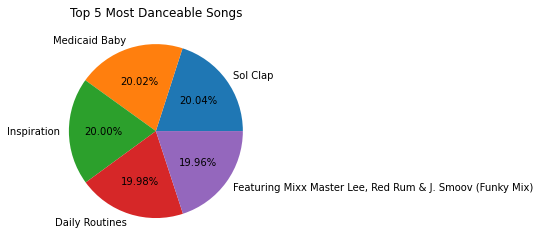

In [28]:
plt.pie(x='danceability', data=danceable_song, autopct='%1.2f%%', labels=danceable_song.track_name)
plt.title('Top 5 Most Danceable Songs')
plt.show()


# Top Trending Genre

In [94]:
top_genre=df[['track_genre','popularity']].sort_values(by='popularity',ascending=False)[:5]
top_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


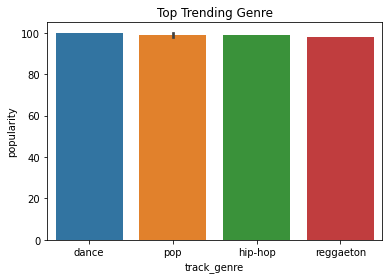

In [98]:
sns.barplot(x='track_genre',y='popularity', data=top_genre)
plt.title('Top Trending Genre')
plt.show()

# Multi-Variant Analysis

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

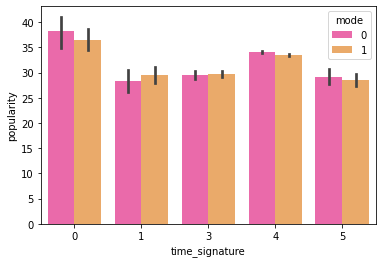

In [125]:
#The relationship between time_signature and popularity
sns.barplot(data=df,x='time_signature',y='popularity',hue='mode',palette='spring')

<AxesSubplot:xlabel='key', ylabel='popularity'>

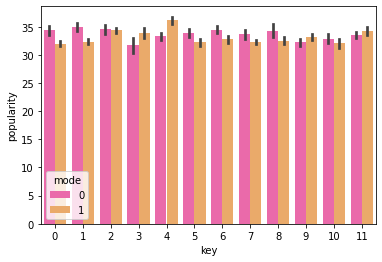

In [127]:
#The relationship between keys and popularity.
sns.barplot(data=df,x='key',y='popularity',hue='mode',palette='spring')

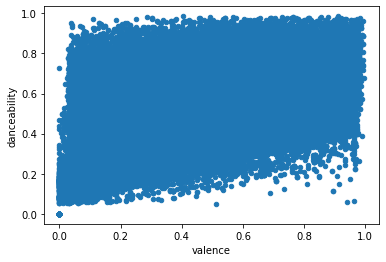

In [36]:
#The relationship between valence and danceabilty using scatter plot.

df.plot(kind='scatter',x='valence',y='danceability')
plt.show()

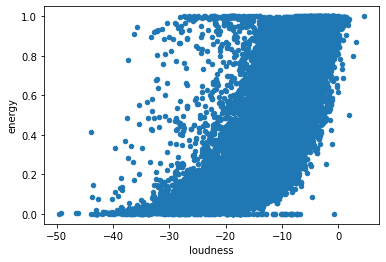

In [21]:
#The relationship between loudness and energy using scatter plot.
df.plot(kind='scatter',x='loudness',y='energy')
plt.show()

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_signature', ylabel='count'>

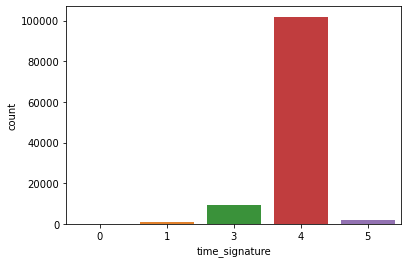

In [24]:
sns.countplot(df['time_signature'])

In [58]:
df.groupby(['track_name','artists'])[['danceability','popularity']].mean()[:5]

,,danceability,popularity
track_name,artists,,
!I'll Be Back!,Rilès,0.823,52.0
"""A"" You're Adorable",Brian Hyland,0.615,39.0
"""C"" IS FOR COOKIE",Little Apple Band,0.553,32.0
"""C"" is for Cookie",Little Apple Band,0.664,8.0
"""Christe, Redemptor omnium""",Traditional;Sistine Chapel Choir;Massimo Palombella,0.111,0.0


In [11]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

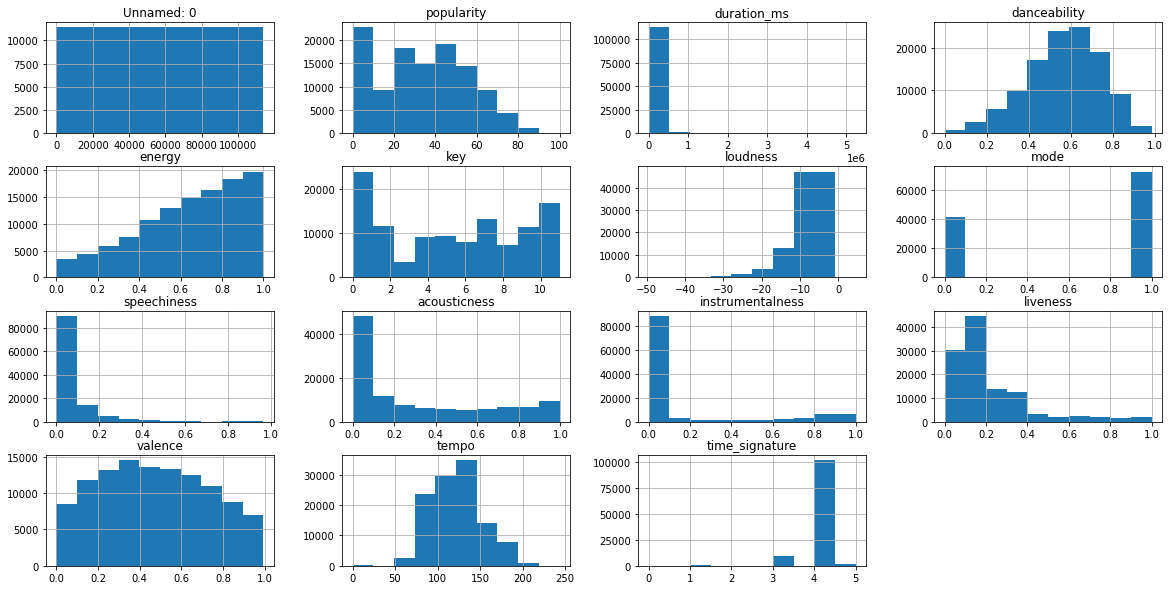

In [16]:
df.hist(figsize=(20,10))
plt.show()

<AxesSubplot:>

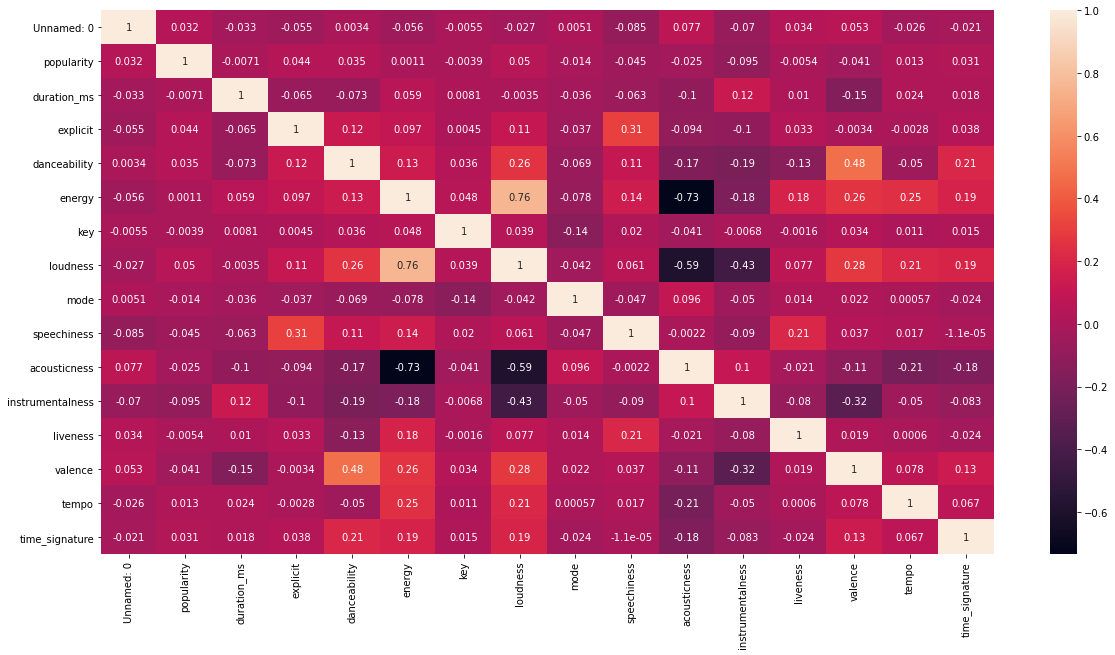

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

# summary of the EDA
Based on the exploratory data analysis the highest positive correlation is between loudness and energy hich is about 76% 
and the negative highest correlation is between acousticness and energy.

# DATA CLEANING

In [77]:
df1=df.copy()

In [78]:
# drop irrelevant columns 
df1.dropna(inplace=True)

In [79]:
df2=df1.drop(['Unnamed: 0', 'track_id'],axis=1)

In [80]:
df3=df2.copy()
df3.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Transformation

In [81]:
# data transformation 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3.loc[:,['artists', 'album_name', 'track_name','explicit', 'track_genre']]=df1.loc[:,['artists', 'album_name', 'track_name',
        'explicit', 'track_genre']].apply(le.fit_transform)
df3


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22486,66,65090,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,4952,5028,38207,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,18534,7238,21507,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [82]:
last_column=df3.pop('danceability')
df3.insert(18,'danceability',last_column)
df3

,artists,album_name,track_name,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability
0,10357,8100,11741,73,230666,0,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,0.676
1,3287,14796,22528,55,149610,0,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,0.420
2,12397,39162,60774,57,210826,0,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,0.438
3,14839,8580,9580,71,201933,0,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,0.266
4,5255,16899,25689,82,198853,0,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,0.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,0,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,0.172
113996,22486,66,65090,22,385000,0,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,0.174
113997,4952,5028,38207,22,271466,0,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,0.629
113998,18534,7238,21507,41,283893,0,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,0.587


# Feature Engineering

In [83]:
# we consider value below 0.5 as 0 [i.e not danceable] and values above 0.5 1[ i.e as danceable]

In [84]:
df3[df3['danceability']<0.5]

,artists,album_name,track_name,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability
1,3287,14796,22528,55,149610,0,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.2670,77.489,4,0,0.420
2,12397,39162,60774,57,210826,0,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,0,0.438
3,14839,8580,9580,71,201933,0,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.1430,181.740,3,0,0.266
6,204,18765,51044,74,229400,0,0.1470,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,0,0.407
9,23455,17349,26348,56,205594,0,0.6320,1,-6.770,1,0.0295,0.42600,0.004190,0.0735,0.1960,78.899,4,0,0.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113991,5317,38464,4757,32,250629,0,0.5310,8,-4.788,1,0.0290,0.00305,0.000000,0.2010,0.1530,146.003,4,113,0.387
113992,13225,31261,68091,38,312566,0,0.8600,10,-4.722,1,0.0421,0.00650,0.000002,0.2460,0.4270,113.949,4,113,0.475
113994,16544,14002,21373,22,305454,0,0.1710,1,-15.668,1,0.0350,0.92000,0.022900,0.0679,0.3270,132.147,3,113,0.331
113995,22486,66,53329,21,384999,0,0.2350,5,-16.393,1,0.0422,0.64000,0.928000,0.0863,0.0339,125.995,5,113,0.172


In [85]:
df3[df3['danceability']>=0.5]

,artists,album_name,track_name,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability
0,10357,8100,11741,73,230666,0,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0.676
4,5255,16899,25689,82,198853,0,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,0.618
5,28649,9306,13744,58,214240,0,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,0,0.688
7,12981,41972,27754,80,242946,0,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,0,0.703
8,12982,41972,35274,74,189613,0,0.414,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.669,130.088,4,0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113990,16544,14003,21367,22,369049,0,0.245,4,-16.357,1,0.0384,0.9700,0.924000,0.1010,0.302,112.011,3,113,0.579
113993,5317,32891,26116,39,256026,0,0.687,10,-4.375,1,0.0287,0.0841,0.000000,0.1880,0.382,104.083,3,113,0.505
113997,4952,5028,38207,22,271466,0,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4,113,0.629
113998,18534,7238,21507,41,283893,0,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.413,135.960,4,113,0.587


In [86]:
df3.loc[df3['danceability']<0.5,'danceability']=0
df3.loc[df3['danceability']>=0.5,'danceability']=1


In [88]:
df4=df3.copy()
df4

,artists,album_name,track_name,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability
0,10357,8100,11741,73,230666,0,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,1.0
1,3287,14796,22528,55,149610,0,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,0.0
2,12397,39162,60774,57,210826,0,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,0.0
3,14839,8580,9580,71,201933,0,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,0.0
4,5255,16899,25689,82,198853,0,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,0,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,0.0
113996,22486,66,65090,22,385000,0,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,0.0
113997,4952,5028,38207,22,271466,0,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,1.0
113998,18534,7238,21507,41,283893,0,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,1.0


In [89]:
df4.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
danceability        0
dtype: int64

In [93]:
x=df4.iloc[:,0:18].values
x

array([[1.03570e+04, 8.10000e+03, 1.17410e+04, ..., 8.79170e+01,
        4.00000e+00, 0.00000e+00],
       [3.28700e+03, 1.47960e+04, 2.25280e+04, ..., 7.74890e+01,
        4.00000e+00, 0.00000e+00],
       [1.23970e+04, 3.91620e+04, 6.07740e+04, ..., 7.63320e+01,
        4.00000e+00, 0.00000e+00],
       ...,
       [4.95200e+03, 5.02800e+03, 3.82070e+04, ..., 1.32378e+02,
        4.00000e+00, 1.13000e+02],
       [1.85340e+04, 7.23800e+03, 2.15070e+04, ..., 1.35960e+02,
        4.00000e+00, 1.13000e+02],
       [4.95200e+03, 2.43570e+04, 5.99900e+03, ..., 7.91980e+01,
        4.00000e+00, 1.13000e+02]])

In [94]:
y=df4.iloc[:,18]
y

0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
113995    0.0
113996    0.0
113997    1.0
113998    1.0
113999    1.0
Name: danceability, Length: 113999, dtype: float64

In [114]:
stc=StandardScaler()
x_train=stc.fit_transform(x_train)
x_test=stc.transform(x_test)

In [115]:
pipe_lda=LogisticRegression()
pipe_lda.fit(x_train,y_train) 

LogisticRegression()

In [116]:
pipe_lda.score(x_test,y_test)


0.7492397660818714

In [99]:
y_pred=pipe_lda.predict(x_test)
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=10,shuffle=True)


In [110]:
pipe_lr=Pipeline(steps=[('myscaler', StandardScaler()),
 ('mypca',PCA(n_components=18)),
 ('lr_ multi',LogisticRegression())])

pipe_lda=Pipeline(steps=[('myscaler', StandardScaler()),
 ('mypca',PCA(n_components=18)),
 ('lr_ multi',LinearDiscriminantAnalysis())])

pipelr=[pipe_lr,pipe_lda]
pipe_dict={0:'Logisticregression',1:'LinearDiscriminantAnalysis'}

for pipe in pipelr:
    pipe.fit(x_train,y_train) 
for i, model in enumerate(pipelr):
    print('{} test accuracy: {}'. format(pipe_dict[i], model.score(x_test,y_test)))


Logisticregression test accuracy: 0.7492397660818714
LinearDiscriminantAnalysis test accuracy: 0.7487426900584795


In [72]:
pipe_lda=LinearRegression()
pipe_lda.fit(x_train,y_train) 

LinearRegression()

In [73]:
pipe_lda.coef_

array([-1.03519645e-07,  3.54838497e-08, -7.73396204e-08,  3.26894832e-04,
        5.62936935e-09,  4.23696987e-02, -2.46893101e-01,  3.39243695e-04,
        1.01988233e-02, -1.97023245e-02,  2.22407345e-01, -1.07152537e-01,
        3.83179395e-02, -1.11136299e-01,  3.21203999e-01, -6.35666243e-04,
        4.90444937e-02,  7.34846655e-06])

In [74]:
pipe_lda.intercept_

0.5738777324498386

In [75]:
y_pred=pipe_lda.predict(x_test)
y_pred

array([0.3701044 , 0.61143425, 0.58466732, ..., 0.48363581, 0.466173  ,
       0.73938114])

In [76]:
compared=pd.DataFrame(list(zip(y_test,y_pred)),columns=['actual','predicted'])
compared

,actual,predicted
0,0.288,0.370104
1,0.585,0.611434
2,0.664,0.584667
3,0.714,0.522360
4,0.518,0.528147
...,...,...
34195,0.535,0.565061
34196,0.625,0.526644
34197,0.421,0.483636
34198,0.255,0.466173


In [102]:
compared=pd.DataFrame(list(zip(y_test,y_pred)),columns=['actual','predicted'])
compared

,actual,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
34195,1.0,1.0
34196,1.0,1.0
34197,0.0,0.0
34198,0.0,0.0


In [67]:
pred_y=pd.DataFrame({'Actual_value:':y_test,'predicted_value:':y_pred,'Difference:':y_test-y_pred})
pred_y

,Actual_value:,predicted_value:,Difference:
42891,0.288,0.484585,-0.196585
16183,0.585,0.617780,-0.032780
801,0.664,0.611930,0.052070
112090,0.714,0.565540,0.148460
28531,0.518,0.584620,-0.066620
...,...,...,...
102183,0.535,0.500330,0.034670
97818,0.625,0.656640,-0.031640
74183,0.421,0.501090,-0.080090
76705,0.255,0.294200,-0.039200


In [51]:
pred_y=pd.DataFrame({'Actual_value:':y_test,'predicted_value:':y_pred,'Difference:':y_test-y_pred})
pred_y[0:50]

,Actual_value:,predicted_value:,Difference:
42891,0.0,0.0,0.0
16183,1.0,1.0,0.0
801,1.0,1.0,0.0
112090,1.0,1.0,0.0
28531,1.0,1.0,0.0
7179,1.0,0.0,1.0
85938,1.0,1.0,0.0
80493,1.0,1.0,0.0
10975,0.0,1.0,-1.0
38988,0.0,1.0,-1.0


In [101]:
pred_y=pd.DataFrame({'Actual_value:':y_test,'predicted_value:':y_pred})
pred_y[0:50]


,Actual_value:,predicted_value:,Difference:
42891,0.0,0.0,0.0
16183,1.0,1.0,0.0
801,1.0,1.0,0.0
112090,1.0,1.0,0.0
28531,1.0,1.0,0.0
7179,1.0,1.0,0.0
85938,1.0,1.0,0.0
80493,1.0,0.0,1.0
10975,0.0,1.0,-1.0
38988,0.0,0.0,0.0
